3. Consider the random graph G(n, p) with average degree c. Show that in the limit of large
n the expected number of triangles in the network is1
6
𝑐3. In other words, show that the
number of triangles is constant, neither growing nor vanishing in the limit of large n

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

## Generate the graph

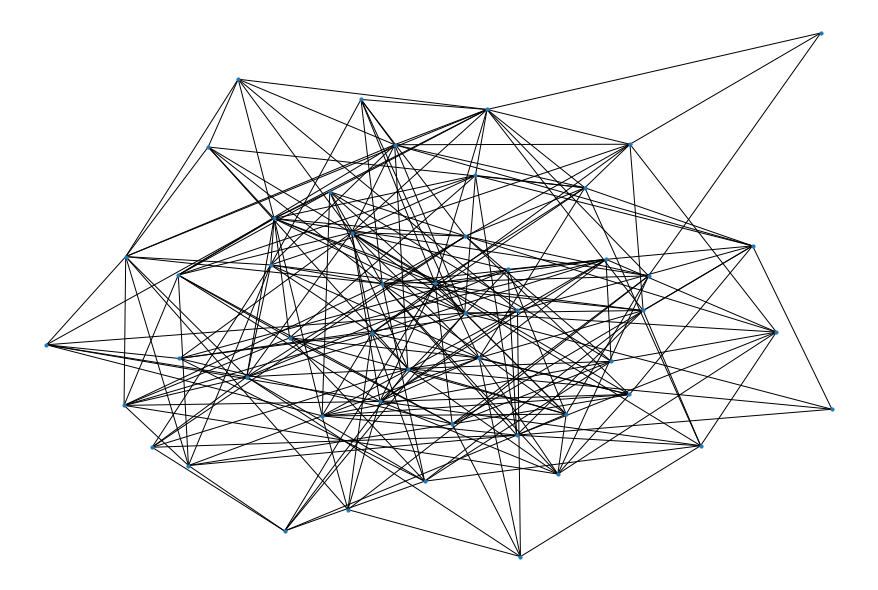

In [2]:
n = 50
p = 0.2
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)
# Plot the graph
plt.figure(figsize=(12,8))
nx.draw(G_erdos, node_size=10)


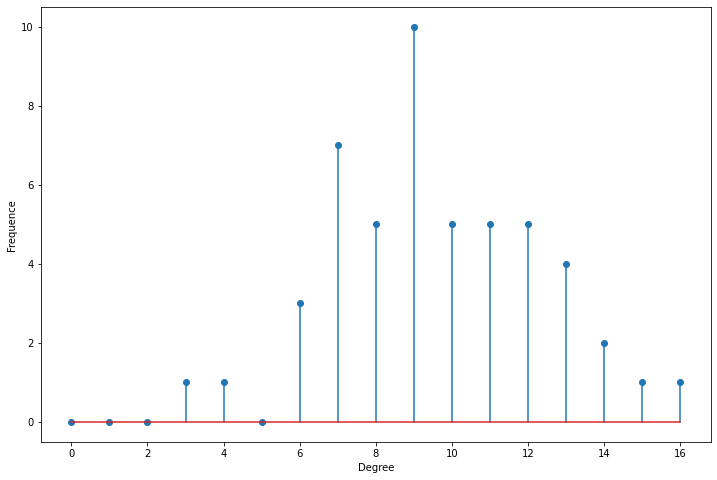

In [3]:
degree_freq = np.array(nx.degree_histogram(G_erdos)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

#### The average degree is given by n×p. With p=0.2 and n=200, we are centered around 40.

#### The degree expectation is given by (n−1)×p


In [4]:
# Get the list of the degrees
degree_sequence_erdos = list(G_erdos.degree())

nb_nodes = n
nb_arr = len(G_erdos.edges())

avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
med_degree = np.median(np.array(degree_sequence_erdos)[:,1])

max_degree = max(np.array(degree_sequence_erdos)[:,1])
min_degree = np.min(np.array(degree_sequence_erdos)[:,1])

esp_degree = (n-1)*p

print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Expected degree : " + str(esp_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 50
Number of edges : 240
Maximum degree : 16
Minimum degree : 3
Average degree : 9.6
Expected degree : 9.8
Median degree : 9.0


### nx.triangles() returns a dictionary denoting the number of triangles each vertex belongs to.

In [5]:
tri=nx.triangles(G_erdos)
print(tri)

{0: 3, 1: 5, 2: 16, 3: 21, 4: 11, 5: 14, 6: 8, 7: 5, 8: 10, 9: 12, 10: 11, 11: 6, 12: 8, 13: 7, 14: 15, 15: 4, 16: 20, 17: 5, 18: 4, 19: 6, 20: 9, 21: 14, 22: 5, 23: 3, 24: 24, 25: 0, 26: 7, 27: 5, 28: 0, 29: 1, 30: 6, 31: 9, 32: 11, 33: 5, 34: 5, 35: 3, 36: 8, 37: 7, 38: 3, 39: 8, 40: 3, 41: 10, 42: 8, 43: 13, 44: 17, 45: 9, 46: 10, 47: 10, 48: 2, 49: 5}


In [6]:
number_of_triangles = sum(nx.triangles(G_erdos).values()) / 3
print(int(number_of_triangles))

137


In [7]:
#edge list with triangle (triadic) relationship
all_cliques= nx.enumerate_all_cliques(G_erdos)
triad_cliques=[x for x in all_cliques if len(x)==3 ]
print("No of Triangles\t",len(triad_cliques),"\n")
print("\nEdge list with triangle (triadic) relationship\n")
print(triad_cliques)


No of Triangles	 137 


Edge list with triangle (triadic) relationship

[[0, 9, 11], [0, 9, 19], [0, 18, 31], [1, 20, 26], [1, 20, 27], [1, 20, 36], [1, 36, 38], [1, 37, 38], [2, 4, 8], [2, 4, 11], [2, 4, 33], [2, 7, 21], [2, 8, 10], [2, 8, 44], [2, 10, 13], [2, 10, 14], [2, 10, 44], [2, 11, 43], [2, 14, 33], [2, 14, 43], [2, 21, 24], [2, 21, 43], [2, 33, 44], [2, 43, 44], [3, 8, 10], [3, 10, 14], [3, 10, 46], [3, 10, 48], [3, 14, 16], [3, 14, 33], [3, 14, 43], [3, 14, 45], [3, 14, 46], [3, 16, 45], [3, 16, 47], [3, 20, 24], [3, 24, 30], [3, 24, 42], [3, 24, 45], [3, 24, 47], [3, 30, 48], [3, 33, 42], [3, 42, 46], [3, 43, 45], [3, 46, 47], [4, 5, 16], [4, 5, 31], [4, 5, 37], [4, 5, 41], [4, 16, 31], [4, 19, 37], [4, 27, 41], [4, 31, 41], [5, 6, 9], [5, 6, 41], [5, 9, 16], [5, 15, 37], [5, 16, 22], [5, 16, 31], [5, 22, 37], [5, 31, 41], [5, 34, 42], [5, 37, 42], [6, 9, 11], [6, 9, 19], [6, 11, 43], [6, 21, 43], [6, 41, 44], [6, 43, 44], [7, 21, 27], [7, 21, 36], [7, 27, 40], [7, 39, 40]

### Here we get average degree = 9.6 (c=9.6)


#### Show that in the limit of large 'n' the expected number of triangles in the network is 1/6 *c^3

### Expected No of triangles predicted by the formula is = 147 (by the formula 1/6 *c^3)
### Actual No of triangles is = 137

## Repeating this experiment for large values of n

In [8]:
def experiment(n):
    p = 0.2
    G = nx.erdos_renyi_graph(n,p, seed =100)
    
    #plt.figure(figsize=(12,8))
    #nx.draw(G, node_size=10)
    degree_sequence_erdos = list(G.degree())
    avg_degree = np.mean(np.array(degree_sequence_erdos)[:,1])
    print("\nActual Average degree : " + str(avg_degree))
    exp_triangle = (avg_degree**3)*(1/6)
    print("Expected No of triangles = ",exp_triangle)

    #Calculating no of triangles..
    number_of_triangles = sum(nx.triangles(G).values()) / 3
    print("Actual No of triangle = ",int(number_of_triangles))


In [9]:
for n in range(1000,5000,1000):
    experiment(n)
    print("----------------------------------------")


Actual Average degree : 199.378
Expected No of triangles =  1320931.9816263583
Actual No of triangle =  1323529
----------------------------------------

Actual Average degree : 399.639
Expected No of triangles =  10637812.723025687
Actual No of triangle =  10640615
----------------------------------------

Actual Average degree : 599.8406666666667
Expected No of triangles =  35971327.615459174
Actual No of triangle =  35967537
----------------------------------------

Actual Average degree : 799.584
Expected No of triangles =  85200282.54373476
Actual No of triangle =  85173020
----------------------------------------
